In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Iris.csv")
X = df.iloc[:, 1:5]
y = df.iloc[:, 5]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])

[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]


In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)
print("Model trained successfully")

Model trained successfully


In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix

for k in [1, 3, 5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)
    y_pred = knn.predict(X_scaled)
    print(f"K={k} Accuracy:", accuracy_score(y, y_pred))


K=1 Accuracy: 1.0
K=3 Accuracy: 0.9533333333333334
K=5 Accuracy: 0.9533333333333334
K=7 Accuracy: 0.9666666666666667
K=9 Accuracy: 0.96


Accuracy: 0.9533333333333334


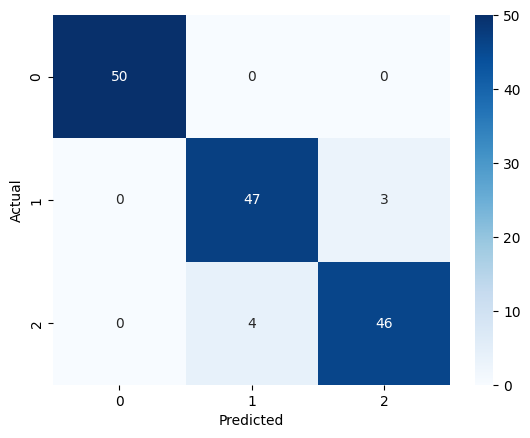

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)
y_pred = knn.predict(X_scaled)
print("Accuracy:", accuracy_score(y, y_pred))
cm = confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


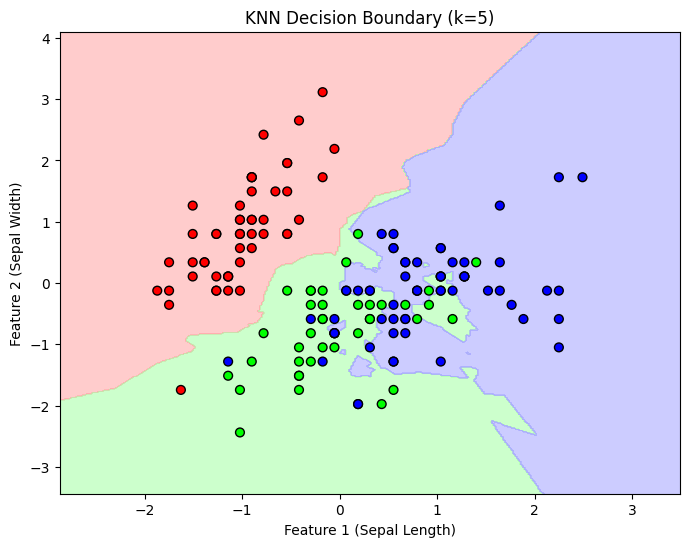

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_plot = X_scaled[:, :2]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_plot, y_encoded)

x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_encoded, cmap=cmap_bold, edgecolor='k', s=40)
plt.xlabel('Feature 1 (Sepal Length)')
plt.ylabel('Feature 2 (Sepal Width)')
plt.title('KNN Decision Boundary (k=5)')
plt.show()